In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Fake tiny data

To get a sense for the idea of dimensionality reduction, let's first use a small data set that contains 3 variables. We can actually view things in 3D even if it a bit inconvenient. 

In [ ]:
tiny = pd.read_csv('./data/tiny_data.csv')

In [ ]:
tiny.head()

In [ ]:
fig = plt.figure(figsize = (6,6))
ax = plt.axes(projection ='3d')
ax.scatter(tiny['a'], tiny['b'], tiny['c'])
plt.xlabel('a')
plt.ylabel('b')

Our first goal is to find a direction in 1D that shows us the most variation. We could try looking at each individual axis:

In [ ]:
sns.stripplot(data = tiny, jitter = False, orient = 'h', alpha = 0.5, s = 15)
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.tick_params(labelsize = 14, size = 0)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

What features of the original 3D data does this capture? How well does it show how the data varies?

## Principal Component Analysis

This is the idea of Principal Component Analysis: to preserve as much of the spread of the data by creating new variables that are linear combinations of the old variables. These new variables are called principal components (PCs). What is a linear combination? (We've actually already done this!)  

For example, with our 3 variables, the equation for the first principal component would look like:

$$PC_1 = c_1a + c_2b + c_3c$$

The coefficients are calculated via the magic of linear algebra.  

Code-wise, doing the PCA is very straightforward:

In [ ]:
from sklearn.decomposition import PCA

**tiny_pca** contains the computed values for the new variables:

In [ ]:
tiny_2 = pd.DataFrame(columns = ['PC1','PC2','PC3'])
tiny_2['PC1'] = tiny_pca[:,0]
tiny_2['PC2'] = tiny_pca[:,1]
tiny_2['PC3'] = tiny_pca[:,2]

In [1]:
tiny_2.head()

NameError: name 'tiny_2' is not defined

In [ ]:
plt.scatter(tiny_2['PC1'], tiny_2['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
sns.stripplot(data = tiny_2, jitter = False, orient = 'h', alpha = 0.5, s = 15)
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.tick_params(labelsize = 14, size = 0)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

We can get an idea of how much each original variable contributes to each PC by looking at the components_ attribute.

In [ ]:
#view all components

In [ ]:
first_pca_component = pd.Series(
    pca.components_[0]
)
print(pca.components_[0])
first_pca_component.plot.bar(rot = 0, fontsize = 12)
plt.xticks([0,1,2],['a','b','c'])
plt.ylabel('Weights in PC1')

In [ ]:
second_pca_component = pd.Series(
    pca.components_[1]
)
second_pca_component.plot.bar(rot = 0, fontsize = 12)
print(pca.components_[1])
plt.xticks([0,1,2],['a','b','c'])
plt.ylabel('Weights in PC2')

Remember that the goal was to capture the original variation in fewer variables. Here's the variance explained by our 3 original variables:

In [ ]:
tiny.var()

In [ ]:
sum(tiny.var())

Variance explained by our PCs:

In [ ]:
pca.explained_variance_

In [ ]:
sum(pca.explained_variance_)

The total variance is the same, but it is divided up between the variables differently.

In [ ]:
tiny_evr = #fill in
print(tiny_evr)

In [ ]:
plt.bar(range(1, len(tiny_evr)+1), tiny_evr*100, fill = False)
plt.ylabel('Percentage of total \nvariance explained', fontsize=14)
plt.xticks([1,2,3], ['PC1','PC2','PC3'])
plt.tick_params(labelsize = 12)
plt.grid(axis = 'y', linestyle = '--')
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ['top','left','right']]
plt.show()

We don't lose much information by only taking the first two PCs. 

## Slightly larger fake data

We previously explored this data.....so perhaps we already know something about it.

In [3]:
work = pd.read_csv('../../data/work_retention.csv')

In [4]:
work.head()

,age,children,commute,salary,years worked,retain
0,63,0,0.095167,54233,2.18,1
1,64,0,0.044500,64739,4.53,1
2,40,1,0.159167,95953,4.57,1
3,58,5,0.091167,59038,2.99,1
4,63,0,0.016000,7958,4.36,1


In [13]:
#split out numeric variables
work_numeric = work[['age', 'children', 'commute', 'salary', 'years worked']]
y = work['retain']

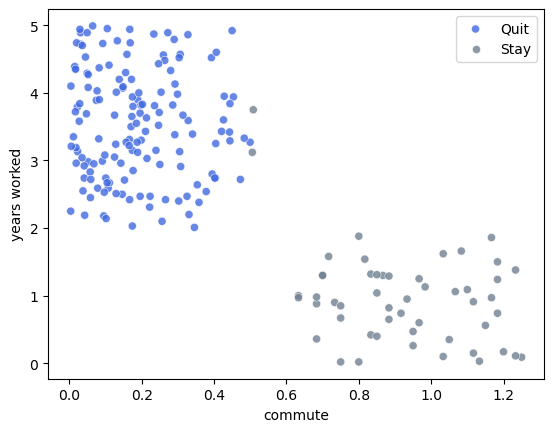

In [14]:
sns.scatterplot(data = work_numeric, x = 'commute', y = 'years worked', hue = y, 
              palette = ['slategrey', 'royalblue'], alpha = 0.8, s = 35)
plt.legend(labels = ['Quit','Stay'])
plt.show()

Last time, we got stuck on how to visualize all 5 variables together. Now we know how to do that using PCA. Aside from helping to visualize our data, Principal Components can also be used as the features of a model (rather than the original variables) and there are some cases when you might even get more accurate results by doing PCA (or some form of dimensionality reduction) before fitting your model.

**THE CURSE OF DIMENSIONALITY** 

The more variables and hence more dimensions and inputs you have, the more compute power you may need. In addition, you can come up with wonky (overfit - we'll talk about this later) models if you have many input variables, and also run the risk of all of the different variables making all of your data look distinct, i.e. no patterns that we can use for predictive models.

In [15]:
#do the pca
from sklearn.decomposition import PCA

pca = PCA()
pca_work = pca.fit_transform(work_numeric)

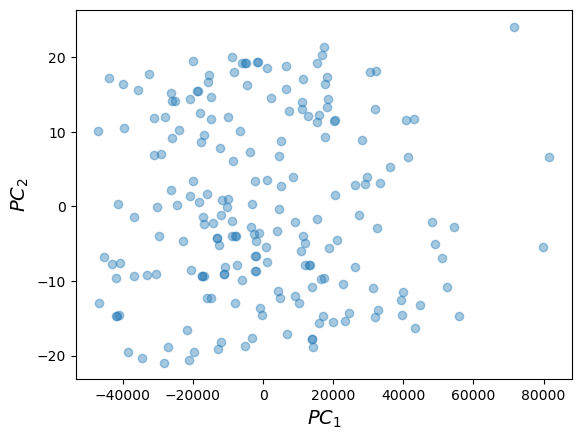

In [16]:
plt.scatter(pca_work[:,0], pca_work[:,1],alpha = 0.4)
plt.xlabel('$PC_1$', fontsize = 14)
plt.ylabel('$PC_2$', fontsize = 14)
plt.show()

Like we did before, we really want to know if there are any differences in the data that relate to whether someone stays or goes. We already know how to write plotting code that will shade in the points by our groups. Let's start with the code we already had and modify it:

In [ ]:
#Updated version
#We could just use work, but let's do this the hard way first
X_df = work.drop(columns = ['retain'])
y = work['retain']
sns.scatterplot(data = X_df, x = 'years worked', y = 'commute', hue = work['retain'],
                palette = ['cornflowerblue','grey'])
plt.legend(labels = ['Quit','Stay'])
plt.show()


In [ ]:
#Updated version
#We could just use work, but let's do this the hard way first


Hmmm, what's going on here? When we only looked at two variables, we DID see a pattern. Why is that pattern masked when we use ALL of the variables? 

We forgot something in our analysis. We should have looked at the univariate distributions, i.e., each individual variable. Let's make a stripchart:

Let's look at a few things:

In [ ]:
#each variance/total

In [ ]:
evr = pca.explained_variance_ratio_
#this is called a scree plot
plt.figure(figsize=(8,6))
plt.bar(range(1, len(evr)+1), evr, fill = False)
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Fraction of total variance explained', fontsize=14)
plt.show()

In [ ]:
first_pca_component = pd.Series(
    pca.components_[0]
)
first_pca_component.plot.bar(rot = 0, fontsize = 12)
plt.xticks([0,1,2,3,4],work_numeric.columns)
plt.ylabel('Weights in PC1')
plt.show()

In [ ]:
for col in work_numeric.columns:
    print(col, work_numeric[col].var())
print('Total variance:', sum(work_numeric.var()))

What's going on?

Aha!! We would have come to a incorrect conclusion based on the first plot. Please note that PCA is NOT a clustering algorithm. It is for dimensionality reduction and can show natural clusters in the data, but it does not actively try to assign labels or cluster the data, i.e. it is unsupervised.

In [ ]:
evr = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
plt.bar(range(1, len(evr)+1), evr, fill = False)
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Fraction of total variance explained', fontsize=14)
plt.show()

In [ ]:
first_pca_component = pd.Series(
    pca.components_[0]
)
first_pca_component.plot.bar(rot = 0, fontsize = 12)
plt.xticks([0,1,2,3,4],work_numeric.columns)
plt.ylabel('Weights in PC1')
plt.show()

In [ ]:
pca.components_[0]

It looks like, to get to 90% of total variance explained, we're going to need 4 dimensions, which isn't so much of a reduction. What's important to note here is that our original result simply wasn't correct. That is an example of what can happen if you fail to thoroughly inspect your data before diving into some type of modeling.